In [95]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

train_dir = os.path.join('Gli_Animali/')


In [96]:
s= os.listdir('Gli_Animali/Elephant')
print (s[:10])

['Elephant_753.jpg', 'Elephant_747.jpg', 'Elephant_790.jpg', 'Elephant_948.jpg', 'Elephant_784.jpg', 'Elephant_974.jpg', 'Elephant_960.jpg', 'Elephant_551.jpg', 'Elephant_237.jpg', 'Elephant_223.jpg']


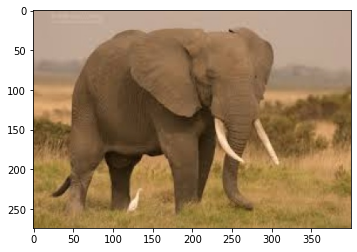

In [97]:
import matplotlib.pyplot as plt 
import matplotlib.image as img

image =  img.imread('Gli_Animali/Elephant/Elephant_177.jpg')
plt.imshow(image)
plt.show()

In [98]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_datagen = ImageDataGenerator(rescale= 1./255,validation_split= 0.2,horizontal_flip = True, rotation_range = 10,zoom_range = [0.8,1.0])

train_generator = image_datagen.flow_from_directory(
    'Gli_Animali',
    target_size = (100,100),
    batch_size = 40,
    subset= 'training',
    class_mode = 'categorical'
) 
validation_generator = image_datagen.flow_from_directory(
    'Gli_Animali',
    target_size = (100,100),
    batch_size = 40,
    subset= 'validation',
    class_mode = 'categorical'
) 


Found 3200 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [99]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(100,100,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128,(3,3),activation= 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(756,activation='relu'),
    tf.keras.layers.Dense(4,activation='softmax')
])

In [100]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 98, 98, 64)        1792      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 49, 49, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 47, 47, 64)        36928     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 23, 23, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 10, 10, 128)     

In [101]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])


In [102]:
history = model.fit(train_generator,epochs=30,validation_data=validation_generator,verbose=1)

Epoch 1/30


2022-04-29 16:25:17.933667: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - ETA: 0s - loss: 1.3303 - accuracy: 0.4166

2022-04-29 16:25:25.645153: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


80/80 [==============================] - 10s 112ms/step - loss: 1.3303 - accuracy: 0.4166 - val_loss: 0.9882 - val_accuracy: 0.5400
Epoch 2/30
80/80 [==============================] - 9s 109ms/step - loss: 0.9303 - accuracy: 0.6128 - val_loss: 0.7956 - val_accuracy: 0.6675
Epoch 3/30
80/80 [==============================] - 9s 109ms/step - loss: 0.7777 - accuracy: 0.6878 - val_loss: 0.7721 - val_accuracy: 0.6975
Epoch 4/30
80/80 [==============================] - 8s 105ms/step - loss: 0.6900 - accuracy: 0.7328 - val_loss: 0.8461 - val_accuracy: 0.6600
Epoch 5/30
80/80 [==============================] - 9s 106ms/step - loss: 0.6237 - accuracy: 0.7631 - val_loss: 0.5993 - val_accuracy: 0.7700
Epoch 6/30
80/80 [==============================] - 9s 107ms/step - loss: 0.6316 - accuracy: 0.7912 - val_loss: 0.5360 - val_accuracy: 0.7925
Epoch 7/30
80/80 [==============================] - 9s 107ms/step - loss: 0.5381 - accuracy: 0.7928 - val_loss: 0.6360 - val_accuracy: 0.7525
Epoch 8/30
80/80

[[0. 0. 0. 1.]]


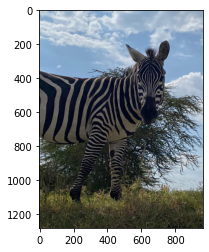

          Prediction is: Zebra


In [105]:

from keras.preprocessing import image

Classes = ['Buffalo','Elephant','Rhino','Zebra']

image_directory = 'Tests/d.jpg'
test_img = image.load_img(image_directory,target_size= (100,100))
test_img = image.img_to_array(test_img)
#test_img = np.expand_dims(img,axis = 0)
prediction_arr = model.predict(test_img[None,:,:])

print (prediction_arr)
max_index = np.argmax(prediction_arr)

image =  img.imread(image_directory)
plt.imshow(image)
plt.show()
print(f'          Prediction is: {Classes[max_index]}')